**SEGUNDO INFORME DE ASTROMETRIA**

Callen Ailen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp, log
import math
import random
import scipy.stats as st

**1_Introducción**

En este trabajo se desarrollo el metodo de la tranformada inversa para obtener una muestra de datos generada aleatoriamente que siga una determinada dsitribucion de probabilidad. Tambien se realizaron el Experimento de Buffon para determinar el valor de $\pi$, el Remuestreo Bootstrap para estimar la varianza de una variable aleatoria y el Test de chi–cuadrado para ver cuando podemos distinguir de que distribucion proviene una muestra.

**2_Resultados**

**2.1_ EJERCICIO 4**

**Método de la transformada inversa: distribución de Poisson**

Simule la ocurrencia de eventos en un proceso de Poisson de tasa λ = 5/h, hasta un tiempo T=3 h. Para ello
recuerde que los tiempos entre eventos siguen una distribución exponencial. Utilice el método de la función
inversa para generar los valores de los saltos.

La distribución de Poisson esta dado por la formula:    $$ p(x=k) = (e^{-\lambda}{\lambda}^k)/k! $$

$$ {\lambda}= 5/h * 3h = 15 $$

Como el factorial de un numero crece muy rapido, es problematico, entonces me conviene tomar el logaritmo a todo y programar eso.


$$ ln(p)= ln(e^{-\lambda}) + ln({\lambda}^k) - ln(k!)
        = {-\lambda} + kln({\lambda}) - ln(k!)$$

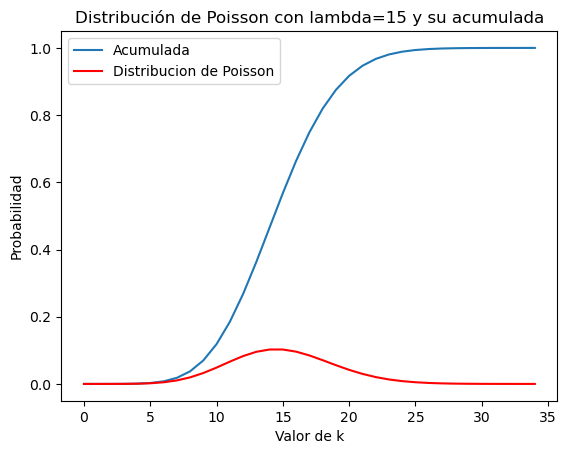

In [97]:
def poisson(k,mu):
    y=[]
    for n in range(k):
         p= -mu + n*log(mu) - log(factorial(n))
         prob1= exp(p)
         y.append(prob1)
    return y

x=poisson(35,15)

acum=np.cumsum(x)
plt.plot(acum, label='Acumulada')
plt.plot(x, color='red', label='Distribucion de Poisson')
plt.xlabel('Valor de k')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson con lambda=15 y su acumulada')   
plt.legend()
plt.show()

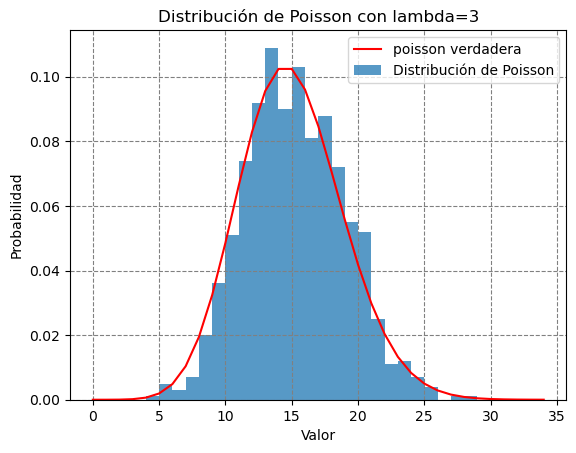

In [99]:

# Parámetros de la distribución de Poisson
mu = 15  # Parámetro de tasa
n = 1000  # Número de muestras a generar

# Inicialización de variables
s = []

# Función de probabilidad de Poisson
def poisson(k, mu):
    return (np.exp(-mu) * mu**k) / np.math.factorial(k)

for i in range(n):
    u = random.uniform(0,1)  # Genera un valor aleatorio entre 0 y 1
    k = 0
    cdf = poisson(k, mu)  # Inicializa la probabilidad acumulada
    
    # Calcula la probabilidad acumulada hasta que sea mayor que el numero random
    while u >= cdf:
        k =k + 1
        cdf = cdf + poisson(k, mu)
    
    s.append(k) #s contiene las muestras de la distribución de Poisson


# Graficar el histograma de las muestras
plt.grid(True, linestyle='--', color='gray')
plt.plot(x, color='red',label='poisson verdadera')
plt.hist(s, bins='auto',density=True, alpha=0.75, label='Distribución de Poisson')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson con lambda=3')
plt.legend()
plt.show()

**2.2_EJERCICIO 7**

**Experimento de Buffon**

Suponga que tiene una mesa con rayas paralelas y equiespaciadas, separadas por una distancia t. Se lanza
una aguja sobre la mesa, que cae en una ubicación aleatoria (uniforme) sobre la mesa, a una distancia x de
la raya más cercana (medida desde el centro de la aguja) y con una orientación también aleatoria θ dada por
el ángulo agudo que forma con la dirección de las rayas. 

**(a) Escriba la función densidad de probabilidad de que la aguja caiga con parámetros (x, θ)**

Todos los valores tanto de x como de θ son igualmente problables por los que su pdf es una cte. 

$\int_{0}^{t/2} f(x) \, dx = 1$   y  $\int_{0}^{\pi /2} f(\theta) \, d\theta$

con $f(x)=cte$  y  $f(\theta)=cte$, por lo que integrando en el intervalo de valores posibles podemos despejar el valor de esa constante. 
De donde se obtiene que $f(x)=2/t$ y  $f(\theta)=2/\pi$ por lo que la probabilidad conjunta es: 

$\int_{0}^{\pi/2} \int_{0}^{t/2} f(x)f(\theta) \, dxd\theta = 1$, entonces $f(x,\theta)=4/\pi t$


**(b) Suponga que l < t, ¿Cuál es la probabilidad de que la aguja toque una raya?**

Para que la aguja toque la linea se debe cumplir que $x <=l/2 sen(\theta)$ por lo que la probabilidad de que esto ocurra es:

$\int_{0}^{\pi/2} \int_{0}^{l/2 sen(\theta)} f(x,\theta) \, dxd\theta = \int_{0}^{\pi/2} \int_{0}^{l/2 sen(\theta)} 4/\pi t  \, dxd\theta = 2l/\pi t$


**c)Calculo de $\pi$**

Para ello escriba un programa que simule arrojar una aguja y determine si cruza la raya marcada.  Luego utilice la probabilidad clásica para estimar $\pi$ a partir de muchas realizaciones del experimento. Este procedimiento es parte de lo que se conoce como métodos de MonteCarlo.
Este problema fue planteado en el siglo XVIII por Georges-Louis Leclerc, conde de Buffon, y se lo conoce como el problema de la ”aguja de Buffon”.

In [101]:
t = 30 #distancia entre las lineas
l = 10 # tamaño de las agujas
n = 500000

x = np.random.random(n)*t/2     #defino mi variable aleatoria x
theta = np.random.random(n)*np.pi/2   #defino mi variable aleatoria theta

#si x<l/2 sin(theta) entonces la aguja va a tocar una linea, por lo tanto tengo que contarlo. para un x determinado 
exitos=0
for i in range(n):
    if x[i] <= (l/2)*np.sin(theta[i]):
        exitos =exitos +1
print(exitos)
p=exitos/n  
print(p)

105909
0.211818


como la probabilidad es p=2*l/pi*t puedo dar una aproximacion del numero pi

In [102]:
pi= 2*l/(t*p)
print('el numero pi es', pi)

el numero pi es 3.1473560635388242


In [103]:
#grafico
n=50
y=[]
m=np.logspace(1,7,n) 
t=20
l=5

for i in range(n):
    exitos=0
    for j in m:
        x=random.uniform(0,t/2)
        theta=random.uniform(0,math.pi/2)
        if x<(l/2)*math.sin(theta):
            exitos=exitos +1
    p=exitos/m
    pi= 2*l/(t*p)
    

In [104]:

m = np.arange(10, 10**5, 2*10**3)
pis=[]

for j in range(len(m)):
    t = 30 #distancia entre las lineas
    l = 10 # tamaño de las agujas
    n = m[j]

    x = np.random.random(n)*t/2     #defino mi variable aleatoria x
    theta = np.random.random(n)*np.pi/2   #defino mi variable aleatoria theta

    #si x<l/2 sin(theta) entonces la aguja va a tocar una linea, por lo tanto tengo que contarlo. para un x determinado 
    exitos=0
    for i in range(n):
        if x[i] <= (l/2)*np.sin(theta[i]):
            exitos =exitos +1
    #print(exitos)
    p=exitos/n  
    #print(p)
    pi= 2*l/(t*p)
    pis.append(pi)
#print(pis)

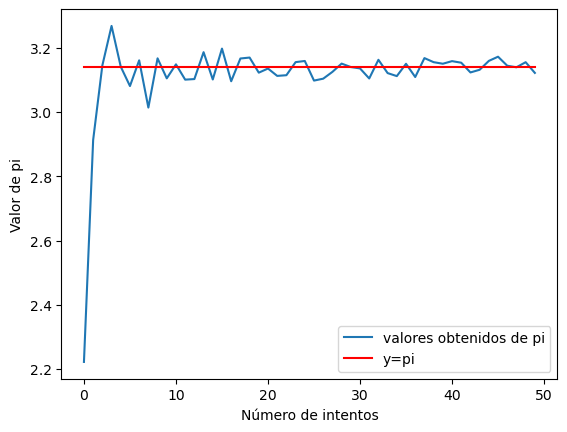

In [106]:
plt.plot(pis, label='valores obtenidos de pi')
lista = [np.pi] * 50
plt.xlabel('Número de intentos')
plt.ylabel('Valor de pi')
plt.plot(lista,color='red', label='y=pi')
plt.legend()
plt.show()

**2.3_ EJERCICIO  8**

**Remuestreo Boostrap**
 
 Diseñe, implemente y verifique una función, que estime la varianza de una V.A. a partir de una muestra de
datos. A continuación, implemente una función que utilize boostrap resampling para calcular los intervalos
de confidencia del estimador de la varianza con un nivel de significancia dado $\alpha$.

Donde la varianza de la muestra es: 0.9884557545827695
la media de la muestra es -0.003061890106803759


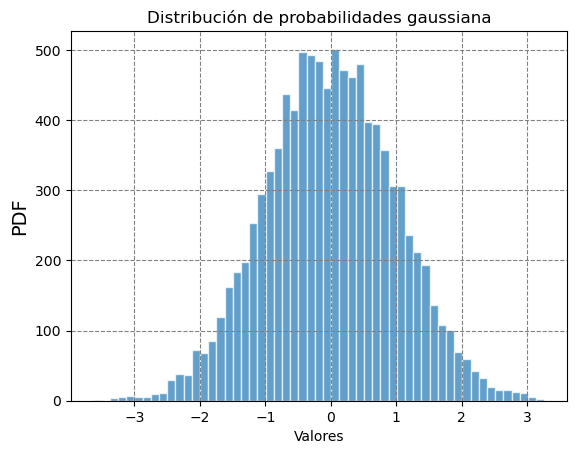

In [112]:
#tenngo que generar numeros que sigan una distribucion gaussiana con media o y sigma 1
n=10000
# Especifica los parámetros de la distribución normal

media = 0  # Media de la distribución
desviacion_estandar = 1  # Desviación estándar de la distribución

# Genera números aleatorios con distribución normal
muestra = np.random.normal(media, desviacion_estandar, n)  # Genera n números aleatorios
mean = np.mean(muestra) # calculo la media de la distribucion 
h = []
for i in range(n): #calculo la varianza para la muestra
    t = (muestra[i]-mean)**2
    h.append(t)
    s=np.sum(h)/(n-1)
print('Donde la varianza de la muestra es:',s)
print('la media de la muestra es', mean)

#puedo graficar los datos para ver que sigan la distribucion normal.

plt.hist(muestra, bins="auto",edgecolor='white',alpha=0.7)
plt.grid(True, linestyle='--', color='gray')
plt.xlabel('Valores')
plt.ylabel('PDF',fontsize = 14)
plt.title('Distribución de probabilidades gaussiana')
plt.show()

In [113]:
#ahora tengo que hacer el remuestreo de los datos que tengo. 

#prueba del random choice 
elementos = [1, 2, 3, 4, 5]
seleccion = np.random.choice(elementos, size=len(elementos), replace=True)

print(seleccion)



[4 3 1 5 4]


In [114]:
#ahora hago lo mismo pero con mi lista x
n=10
media = 0  
desviacion_estandar = 1
muestra = np.random.normal(media, desviacion_estandar, n)  # Genera n números aleatorios
x = np.random.choice(muestra, size=len(muestra), replace=True)
print('muestra',muestra)
print('remuestreo',x)

muestra [ 0.43054511  0.02225366  1.9251352  -0.34558206  0.19128942 -2.02695275
  1.33090834 -0.65740115  0.64168915  1.1018225 ]
remuestreo [ 1.33090834 -0.34558206 -0.34558206 -2.02695275  0.02225366  0.19128942
  0.19128942  0.64168915  1.33090834  1.33090834]


10000
10000
el promedio es -0.010537182696626709


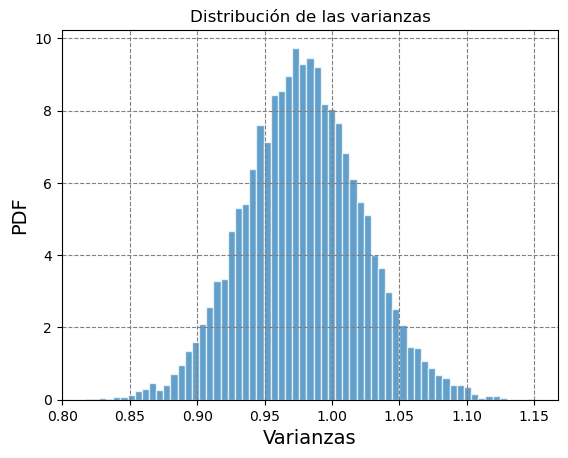

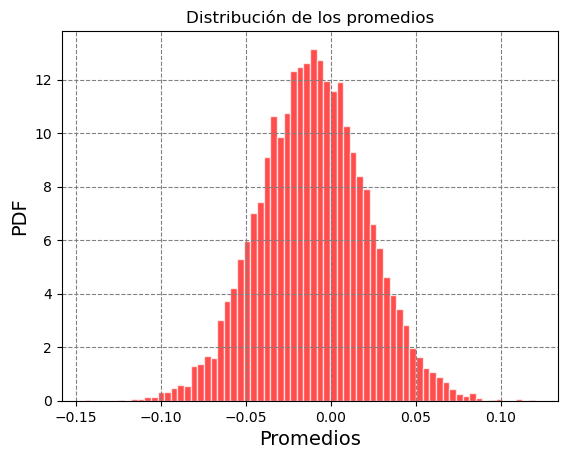

In [117]:
#eso fue un solo remuestreo, ahora necesito hacerlo 100 veces.. uso un for
n=1000
media = 0  
desviacion_estandar = 1
muestra = np.random.normal(media, desviacion_estandar, n)
m=10000   #a medida que aumento el numero mejora el histograma
prom=[]
varianza=[]

for i in range(m):
    x = np.random.choice(muestra, size=len(muestra), replace=True)
    #calcular la varianza y media de cada muestra y guardarla en una lista.
    mean = np.mean(x)
    prom.append(mean)
    v=np.var(x)
    varianza.append(v)

print(len(prom))
print(len(varianza))
promedio=sum(prom)/m     #porque no coinciden???

print('el promedio es',promedio)
plt.hist(varianza,bins="auto",density = True,edgecolor='white',alpha=0.7)
plt.xlabel('Varianzas',fontsize = 14)
plt.ylabel('PDF',fontsize = 14)
plt.grid(True, linestyle='--', color='gray')
plt.title('Distribución de las varianzas')
plt.show()

plt.hist(prom,bins="auto",density=True, color='red',edgecolor='white',alpha=0.7)
plt.xlabel('Promedios',fontsize = 14)
plt.ylabel('PDF',fontsize = 14)
plt.title('Distribución de los promedios')
plt.grid(True, linestyle='--', color='gray')
plt.show()

In [118]:
#calcular los intervalos de confianza..
#elijo aplha=0.05, entonces los 
#tengo que usar el histograma de varianzas o de medias?
alpha=0.05
m=10000
#primero tengo que ordenar las listas de media y varianza de menor a mayor
lista = [5, 2, 9, 1, 5, 6]
lista_ordenada = sorted(lista)
print(lista_ordenada)

i=alpha*m
i_d=(1 - alpha)*m

print(i,i_d) # estos son los lugares en los que estan mis valores del intervalo de confianza.. tengo que saber que valor de promedio y/o varianza correspondiente a esos lugares..
prom_ord=sorted(prom)
var_ord=sorted(varianza)
print('el intervalo de confianza en promedio es',prom_ord[500], prom_ord[9500])
print('el intervalo de confianza en varianza es',var_ord[500], var_ord[9500]) 

[1, 2, 5, 5, 6, 9]
500.0 9500.0
el intervalo de confianza en promedio es -0.06146917622777712 0.04124540967007102
el intervalo de confianza en varianza es 0.9079452697393005 1.0510975122699862


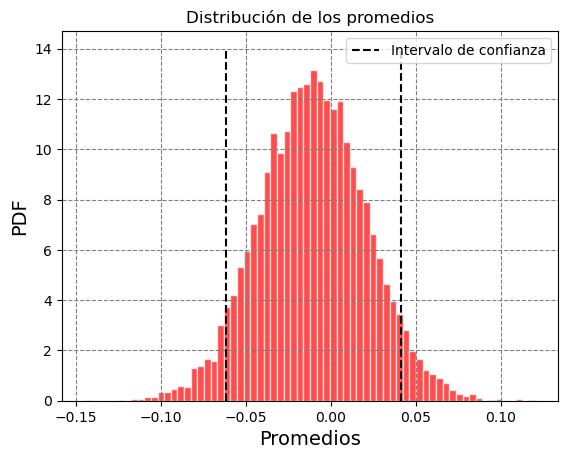

In [120]:


x1 = [prom_ord[500], prom_ord[500]]
y1 = [0, 14]  # Puedes ajustar los valores de acuerdo a tu gráfico

# Puntos para la línea vertical en x = 5
x2 = [prom_ord[9500], prom_ord[9500]]
y2 = [0, 14]  # Ajusta los valores según sea necesario

# Dibuja el gráfico
plt.plot(x1, y1, label='Intervalo de confianza', color='black', linestyle='--')
plt.plot(x2, y2, color='black', linestyle='--')
plt.hist(prom,bins="auto",density=True, color='red',edgecolor='white',alpha=0.7)
plt.xlabel('Promedios',fontsize = 14)
plt.grid(True, linestyle='--', color='gray')
plt.ylabel('PDF',fontsize = 14)
plt.title('Distribución de los promedios')
plt.legend()
plt.show()


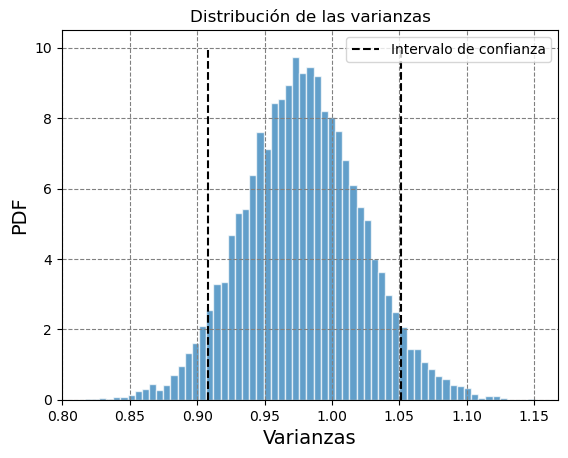

In [121]:

x1 = [var_ord[500], var_ord[500]]
y1 = [0, 10]  # Puedes ajustar los valores de acuerdo a tu gráfico

# Puntos para la línea vertical en x = 5
x2 = [var_ord[9500], var_ord[9500]]
y2 = [0, 10]  # Ajusta los valores según sea necesario
plt.plot(x1, y1, label='Intervalo de confianza', color='black', linestyle='--')
plt.plot(x2, y2, color='black', linestyle='--')
plt.hist(varianza,bins="auto",density = True,edgecolor='white',alpha=0.7)
plt.xlabel('Varianzas',fontsize = 14)
plt.ylabel('PDF',fontsize = 14)
plt.grid(True, linestyle='--', color='gray')
plt.title('Distribución de las varianzas')
plt.legend()
plt.show()

**2.4_ EJERCICIO 9**

**Test de chi–cuadrado** 

El método Chi-cuadrado, es considerado como una prueba que mide la discrepancia entre una distribución observada y otra teórica, indicando en qué medida existen diferencias entre ambas, por medio de una prueba de hipótesis nula y alternativa.


**a)** Diseñe, implemente y verifique una función que calcule el test de “chi-cuadrado” para comparar un histograma H1 con un modelo dado por una distribución Binomial, f(x) ∼ B(n = 10,  p = 0.4).

In [3]:
def binomial(n,p,k):
    y=[]
    for i in range(k):
         b=log(factorial(n)) - (log(factorial(i)) + log(factorial(n-i))) + i*log(p) + (n-i)*log(1-p)
         f= exp(b)
         y.append(f)
    return y

In [140]:
y=binomial(11,0.4,11)

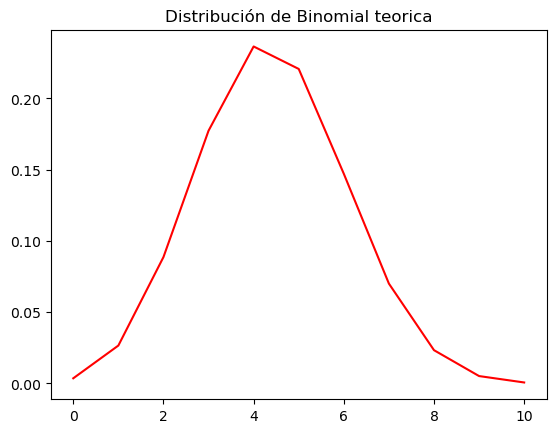

In [161]:
plt.plot(y,color='red')
plt.title('Distribución de Binomial teorica')
plt.show()

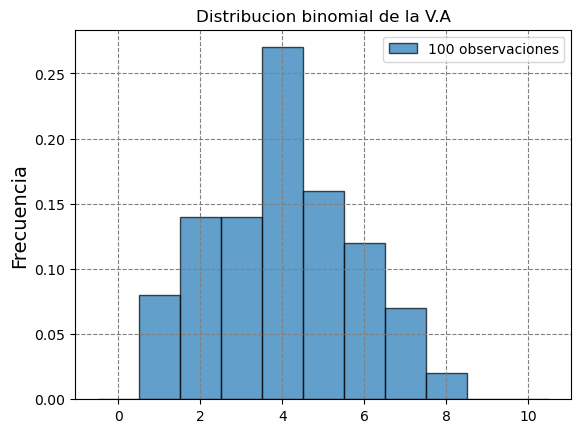

Donde la frecuencia de los valores es: [0.   0.08 0.14 0.14 0.27 0.16 0.12 0.07 0.02 0.   0.  ]


In [166]:
#100 observaciones de la V.A. binomial y calcule las frecuencias de cada valor.
# Parámetros
r=[]
for i in range(100):
    x=st.binom.rvs(10, 0.4)
    r.append(x)
    
hm=plt.hist(r,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7,density=True, label='100 observaciones')
plt.ylabel('Frecuencia',fontsize=14)
plt.grid(True, linestyle='--', color='gray')
plt.title('Distribucion binomial de la V.A')
plt.legend()
plt.show()

print('Donde la frecuencia de los valores es:',hm[0])

**b)** Calcule el estadístico $\chi²$ a partir del modelo y de los datos simulados.

In [167]:
 # en los h primero el y, despues el x..
chi=(hm[0]- y)**2/y
chi2=np.sum(chi)
print('el chi2 para 100 observaciones es',chi2)


el chi2 para 100 observaciones es 0.18118304253502


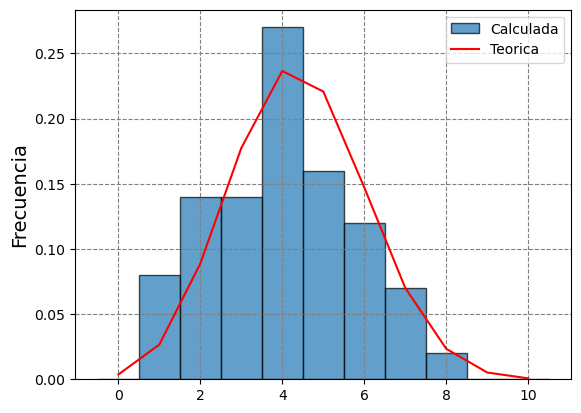

In [168]:
ho=plt.hist(r,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7, label='Calculada',density=True)
plt.plot(y,label='Teorica',color='red')
plt.ylabel('Frecuencia',fontsize=14)
plt.grid(True, linestyle='--', color='gray')
plt.legend()
plt.show()

**(c) Realice una prueba de hipótesis completa para decidir si los datos están en acuerdo con el modelo.**

Hipótesis Hipótesis nula $H_{0}$ = La muestra de la distribución empírica sigue la distribución Binomial teórica.

Hipótesis alternativa $H_{a}$ = La muestra de la distribución empírica no sigue la distribución Binomial teórica.


Zona de aceptación: $\chi^2 < \chi^2_{\alpha,\nu}$

Zona de rechazo: $\chi^2 > \chi^2_{\alpha,\nu}$

donde tomamos $\alpha=0.05$  y los grados de libertad son $\nu=10$, con lo que nos queda un chi de comparacion $\chi² = 18.307$(1)


In [169]:
print('Como nuestro chi=',chi2,' se acepta la hipotesis nula y se descarta la hipótesis alternativa. Esto significa que para este nivel de significancia las distribuciones son indistinguibles ')

Como nuestro chi= 0.18118304253502  se acepta la hipotesis nula y se descarta la hipótesis alternativa. Esto significa que para este nivel de significancia las distribuciones son indistinguibles 


**(d) Calcule el valor-p de la prueba.**

El valor-p se puede calcular de la siguiente forma:

$p-value=1-F(n,\chi²)$,  con F la función acumulada.

Es un valor que va entre 0 y 1, siendo 1 un modelo que ajusta muy bien y 0 un modelo que no se ajusta. 

In [151]:
f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print(p)

0.9999999999952771


Por lo que podemos ver de este valor de p, nuevamente nos confirma que podemos aceptar la hipotesis nula. Esto signifca que para un intervalo de confianza del 95% las distribuciones son indistinguibles. 

**(f) Simule una muestra de 10000 realizaciones de una V.A. con f(x) ∼ B(n = 1000, p = 0.4) y repita el
punto anterior.**

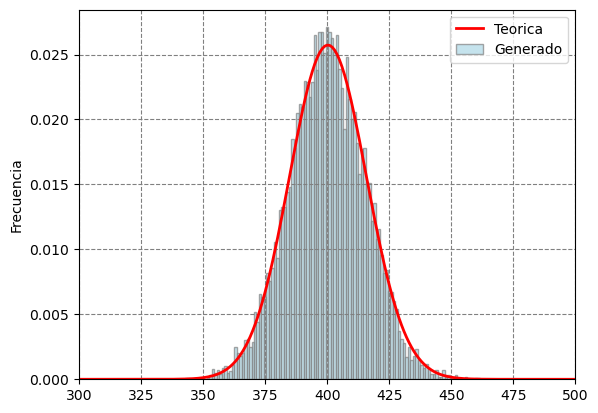

In [170]:
y=binomial(1001,0.4,1001)
r=[]
for i in range(10000):
    x=st.binom.rvs(1000, 0.4)
    r.append(x)

    

plt.plot(y,label='Teorica',color='red',lw=2)
plt.xlim(300,500)
h=plt.hist(r,bins=np.arange(-0.5,1001.5,1),edgecolor='gray',alpha=0.7, label='Generado',density=True, color='lightblue')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', color='gray')
plt.legend()
plt.show()

In [158]:
h1=h[0][325:475]
y1=y[325:475]

# en esta parte se tomo un rango mas acotado de los valores porque la distribucion tenia valores muy pequeños en los extremos y no se podia hacer la division. 

In [159]:
chi=(h1[0]- y1)**2/y1
chi2=np.sum(chi)
print('el chi es',chi2)

f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print('el p es',p)

el chi es 0.999998591531414
el p es 0.9998278854823843


**e)** Simule muestras de 100 observaciones de una V.A. N(μ, σ), con σ=2.5 y μ que varíe entre 2 y 7. Estudie cómo varía el valor-p y determine si en algún rango de μ se puede “confundir” el modelo.

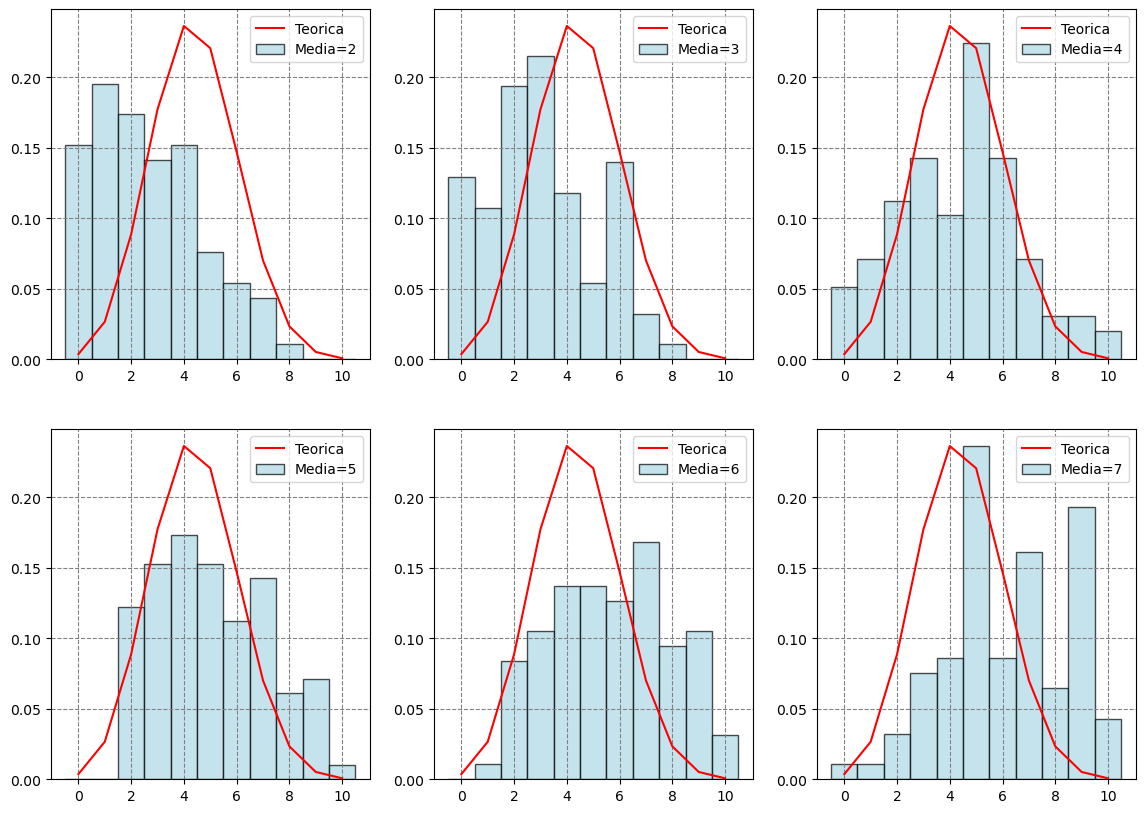

In [4]:
n=100
desviacion_estandar=2.5
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

media=2
y=binomial(11,0.4,11)
muestra = np.random.normal(media, desviacion_estandar, n)
axs[0,0].plot(y,label='Teorica',color='red')
h2=axs[0,0].hist(muestra,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7,density=True,label='Media=2',color='lightblue')
axs[0,0].legend()
axs[0,0].grid(True, linestyle='--', color='gray')



media=3
muestra = np.random.normal(media, desviacion_estandar, n)
axs[0,1].plot(y,label='Teorica',color='red')
h3=axs[0,1].hist(muestra,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7,density=True,label='Media=3',color='lightblue')
axs[0,1].legend()
axs[0,1].grid(True, linestyle='--', color='gray')


media=4
muestra = np.random.normal(media, desviacion_estandar, n)
axs[0,2].plot(y,label='Teorica',color='red')
h4=axs[0,2].hist(muestra,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7,density=True,label='Media=4',color='lightblue')
axs[0,2].legend()
axs[0,2].grid(True, linestyle='--', color='gray')

media=5
muestra = np.random.normal(media, desviacion_estandar, n)
axs[1,0].plot(y,label='Teorica',color='red')
h5=axs[1,0].hist(muestra,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7,density=True,label='Media=5',color='lightblue')
axs[1,0].legend()
axs[1,0].grid(True, linestyle='--', color='gray')


media=6
muestra = np.random.normal(media, desviacion_estandar, n)
axs[1,1].plot(y,label='Teorica',color='red')
h6=axs[1,1].hist(muestra,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7,density=True,label='Media=6',color='lightblue')
axs[1,1].legend()
axs[1,1].grid(True, linestyle='--', color='gray')


media=7
muestra = np.random.normal(media, desviacion_estandar, n)
axs[1,2].plot(y,label='Teorica',color='red')
h7=axs[1,2].hist(muestra,bins=np.arange(-0.5, 11.5, 1),edgecolor='black',alpha=0.7,density=True,label='Media=7',color='lightblue')
axs[1,2].legend()
axs[1,2].grid(True, linestyle='--', color='gray')

plt.show()

In [5]:
chi=(h2[0]- y)**2/y
chi2=np.sum(chi)
print('el chi de media 2 es',chi2)

f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print('el p es',p)

chi=(h3[0]- y)**2/y
chi2=np.sum(chi)
print('el chi de media 3 es',chi2)

f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print('el p es',p)


chi=(h4[0]- y)**2/y
chi2=np.sum(chi)
print('el chi de media 4 es',chi2)

f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print('el p es',p)


chi=(h5[0]- y)**2/y
chi2=np.sum(chi)
print('el chi de media 5 es',chi2)

f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print('el p es',p)

chi=(h6[0]- y)**2/y
chi2=np.sum(chi)
print('el chi de media 6 es',chi2)

f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print('el p es',p)

chi=(h7[0]- y)**2/y
chi2=np.sum(chi)
print('el chi de media 7 es',chi2)

f=st.chi2.cdf(chi2,10) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 10 grados de libertad en un valor específico chi2
p=1-f
print('el p es',p)

el chi de media 2 es 7.451532098714165
el p es 0.6822397747925948
el chi de media 3 es 4.931694280115842
el p es 0.8956939095911701
el chi de media 4 es 1.472691489448899
el p es 0.9990178691044093
el chi de media 5 es 1.205271640133556
el p es 0.9995976439831362
el chi de media 6 es 3.783788399442865
el p es 0.9565739724014894
el chi de media 7 es 9.854776415036861
el p es 0.4533254254246082


**3_ Conclusiones**

En Conclusion, podemos ver como crear una muestra de datos que sigan una determinada distribucion utilizando el metodo de la tranformacion inversa, como asignarle un determinado intervalo de confianza a un dado estadistico mediante el remuestreo de Bootstrap y por ultimo como determinar con un cierto nivel de confianza si una muestra proviene de una dada distribucion mediante el test de chi-cuadrado.

Del método de remuestreo podemos observar que a medida que aumento el numero de muestras mejora el resultado obtenido, mientras que para el método del chi-cuadrado podemos ver que una gaussiana de media 4 se confunde con una distribucion binomial centrada en 4. Para las otras distribuciones gaussianas con distintos valores medios el metodo puede distinguirlas. 

**4_ Referencias**

(1) link: https://datatab.es/tutorial/chi-square-distribution